<a href="https://colab.research.google.com/github/dtoralg/IE_Calidad_ML/blob/main/Ejercicios/Modulo%205/Modulo_5_Ejercicio_2_Regularizacion_L1_L2_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ejercicio 2: Regularización L1 vs L2 — ¿cuándo usar cada una?**
**Explora cómo controlar el sobreajuste en modelos de regresión con Lasso y Ridge**

### **Introducción**
En este ejercicio aprenderemos a utilizar técnicas de regularización para mejorar modelos de regresión. Compararemos **L1 (Lasso)** y **L2 (Ridge)** y observaremos cómo afectan a los coeficientes del modelo y al rendimiento en validación.

La regularización es esencial para evitar el **sobreajuste**, especialmente cuando hay muchas variables o ruido en los datos. Evaluaremos también cuándo conviene usar L1, L2 o un modelo sin regularización.

In [1]:
# Celda 1: Carga de librerías y configuración
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
sns.set(style='whitegrid')

In [2]:
# Celda 2: Cargar y explorar el dataset
url = 'https://github.com/dtoralg/IE_Calidad_ML/raw/main/Data/durabilidad_piezas.csv'
df = pd.read_csv(url)
df.head()

,ID_pieza,Dureza_material,Espesor,Temperatura_fabricacion,Presion_molde,Velocidad_produccion,Tiempo_exposicion,Tratamiento_termico,Proveedor_material,Durabilidad
0,1,45.059218,4.737020,849.986582,375.016971,16,8.340820,Sí,C,14420.857305
1,2,47.718688,4.874542,775.627351,343.459912,45,3.667618,Sí,B,12054.034726
2,3,38.994733,2.816336,740.569892,222.519061,12,8.431119,No,B,5900.292775
3,4,59.172977,3.231814,841.921312,466.097462,11,6.604534,No,B,7876.068384
4,5,52.752826,3.686595,774.340835,185.566983,71,4.697800,Sí,A,16551.339649


In [3]:
# Celda 3: Descripción general del dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_pieza                 50000 non-null  int64  
 1   Dureza_material          50000 non-null  float64
 2   Espesor                  50000 non-null  float64
 3   Temperatura_fabricacion  50000 non-null  float64
 4   Presion_molde            50000 non-null  float64
 5   Velocidad_produccion     50000 non-null  int64  
 6   Tiempo_exposicion        50000 non-null  float64
 7   Tratamiento_termico      50000 non-null  object 
 8   Proveedor_material       50000 non-null  object 
 9   Durabilidad              50000 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 3.8+ MB


,ID_pieza,Dureza_material,Espesor,Temperatura_fabricacion,Presion_molde,Velocidad_produccion,Tiempo_exposicion,Durabilidad
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,50.055476,2.542815,799.752365,300.038206,50.015420,5.245505,11502.704259
std,14433.901067,9.983005,1.418848,50.048824,115.078605,28.556384,2.747127,4643.507246
min,1.000000,10.842073,0.100094,603.558277,100.007889,1.000000,0.500119,-4071.358823
25%,12500.750000,43.346413,1.313581,765.847118,200.258703,25.000000,2.857130,7910.822625
50%,25000.500000,50.049135,2.538815,799.708177,300.018486,50.000000,5.223376,11503.689346
75%,37500.250000,56.778248,3.773929,833.717055,399.619927,75.000000,7.619342,15070.377216
max,50000.000000,88.657938,4.999944,983.909273,499.996776,99.000000,9.999870,28067.166686


In [4]:
# Celda 4: Preparación del dataset
X = df.drop(columns=['ID_pieza', 'Durabilidad'])
y = df['Durabilidad']
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(exclude='object').columns.tolist()
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())]), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

In [5]:
# Celda 5: División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Celda 6: Entrenamiento de modelos Linear, Ridge y Lasso
modelos = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=10),
    'Lasso': Lasso(alpha=10)
}
resultados = {}
for nombre, modelo in modelos.items():
    pipe = Pipeline([
        ('preproc', preprocessor),
        ('model', modelo)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    resultados[nombre] = {'MAE': mae, 'RMSE': rmse, 'modelo': pipe.named_steps['model'], 'pipeline': pipe}
pd.DataFrame(resultados).T[['MAE', 'RMSE']]

,MAE,RMSE
Linear,1588.420651,1995.917323
Ridge,1588.424178,1995.918437
Lasso,1588.654698,1995.996206


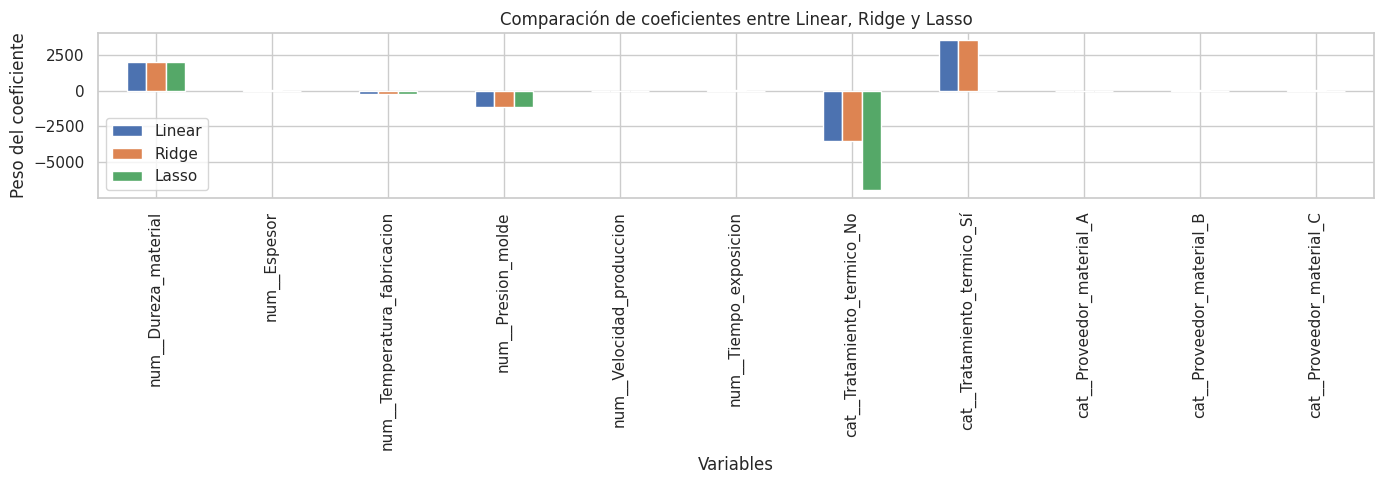

In [7]:
# Celda 7: Visualización de los coeficientes
coefs = pd.DataFrame({})
for nombre, info in resultados.items():
    modelo = info['modelo']
    if hasattr(modelo, 'coef_'):
        coef = modelo.coef_
        nombres_cols = info['pipeline'].named_steps['preproc'].get_feature_names_out()
        coefs[nombre] = pd.Series(coef, index=nombres_cols)
coefs.plot(kind='bar', figsize=(14,5))
plt.title('Comparación de coeficientes entre Linear, Ridge y Lasso')
plt.xlabel('Variables')
plt.ylabel('Peso del coeficiente')
plt.tight_layout()
plt.show()

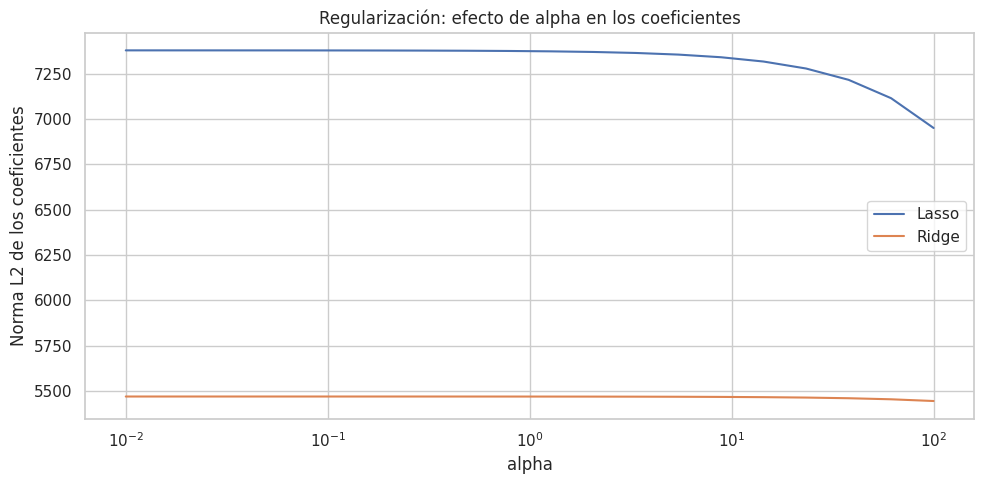

In [8]:
# Celda 8: Evolución de coeficientes con diferentes valores de alpha
alphas = np.logspace(-2, 2, 20)
lasso_coefs, ridge_coefs = [], []
for alpha in alphas:
    for modelo, lista in zip([Lasso(alpha=alpha), Ridge(alpha=alpha)], [lasso_coefs, ridge_coefs]):
        pipe = Pipeline([
            ('preproc', preprocessor),
            ('model', modelo)
        ])
        pipe.fit(X_train, y_train)
        lista.append(pipe.named_steps['model'].coef_)
plt.figure(figsize=(10,5))
plt.plot(alphas, np.linalg.norm(lasso_coefs, axis=1), label='Lasso')
plt.plot(alphas, np.linalg.norm(ridge_coefs, axis=1), label='Ridge')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Norma L2 de los coeficientes')
plt.title('Regularización: efecto de alpha en los coeficientes')
plt.legend()
plt.tight_layout()
plt.show()

### **Conclusiones**
- La regresión lineal sin regularización puede sobreajustar si hay ruido o multicolinealidad.
- **Ridge** penaliza coeficientes grandes y los conserva.
- **Lasso** puede eliminar variables (coeficientes cero), útil para selección de características.
- El hiperparámetro `alpha` es clave para controlar la complejidad del modelo.

**Preguntas para reflexionar:**
- ¿Qué tipo de regularización funcionó mejor aquí y por qué?
- ¿Qué ventajas aporta Lasso si tu objetivo es interpretabilidad?
- ¿Cómo seleccionarías el mejor `alpha` en producción?